# Raport II - Proces Ryzyka i ułamkowy ruch Browna

# Spis Treści

1. Zadanie 1: Proces ryzyka\
    1.1. Wprowadzenie teoretyczne\
    1.2. Cel zadania\
    1.3. Obliczenia
2. Zadanie 2: Metoda rozkładu Choleskiego dla ułamkowego ruchu Browna
3. Bibliografia

# 1. Zadanie 1: Proces ryzyka



## 1.1. Wprowadzenie teoretyczne

## Proces Ryzyka

Proces ryzyka jest opisany wzorem:
$$ R(t) = R_0 + c(t) - \sum_{i}^{N(t)}X_i$$

gdzie:
*   $R_0$ - kapitał początkowy,
*   $c(t)$ - przychody otrzymywane w kroku czasowym,
*   $N(t)$ - proces liczący straty,
* $X_i$ - wysokość wypłacanych odszkodowań.






## Jednorodny proces Poissona

Jednorodny proces Poissona z intensywnością $\lambda$ to proces liczący {$N(t) , t \geq 0$}, który spełnia warunki:



*   $N(0) = 0 $,
*   $N(t)$ ma niezależne przyrosty,
*   $N(t)$ ma stacjonarne przyrosty,
*   $N(t) \sim Poiss(\lambda t)$



### Algorytm

1. Generuj skoki $I \sim Poiss(\lambda t)$
2. Jeśli $ I = 0 $ STOP. W przeciwnym razie wygeneruj  $U_1,...,U_I$, gdzie $U_i$ iid. i $U_i \sim U(0,T)$
3. Posortuj $U_1,...,U_I$
4. Wstaw $S_i = U_{i:I}$, $ I = 1,2,..,I$. Zwróć wektor momentów skoków
5. Stwórz wektor o tej samej długości co wektor momentów, przedstawiający ilość skoków.
6. Narysuj jednorodny proces Poissona.




## 1.2. Cel zadania

Celem zadania jest dopasowanie modelu klasycznego procesu ryzyka do danych otrzymanych od prowadzącego. Dane zawierają jedną trajektorię pewnego procesu Ryzyka wysymulowanego na odcinku $[0, 100]$, z krokiem czasowym $h$. Na potrzeby zadania przyjęto $h = 0.01$. Należy znaleźć rozkład zmiennej losowej $X_i$, oznaczającej wielkość $i$-tej szkody, a także wyestymować parametr $\lambda$, będący intensywnością jednorodnego procesu Poissona.

## 1.3. Obliczenia

### Zaimportowanie potrzebnych bibliotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import statistics
import numpy as np
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import random

### Wczytanie danych z pliku

In [4]:
with open("data.json", "r", encoding="utf-8") as file:
    data = json.loads(file.read())

T = data["T"]
h = data["h"]
theta = data["theta"]
traj = data["trajektoria"]

#print(data["trajektoria"])
print(T, h, theta)
len(traj)


[15.0, 15.78, 16.56, 17.34, 18.12, 18.9, 19.68, 20.46, 21.240000000000002, 22.02, 22.8, 23.58, 24.36, 25.14, 25.92, 26.7, 27.48, 28.26, 29.04, 29.82, 30.6, 31.38, 32.16, 32.94, 33.72, 34.5, 35.28, 36.06, 36.84, 37.62, 38.4, 39.18, 39.96, 40.74, 41.52, 42.300000000000004, 43.08, 43.86, 44.64, 45.42, 46.2, 46.980000000000004, 47.76, 48.54, 49.32, 50.1, 50.88, 51.660000000000004, 52.44, 53.22, 54.0, 54.78, 55.56, 56.34, 57.120000000000005, 57.900000000000006, 58.68000000000001, 59.46000000000001, 60.239999999999995, 61.019999999999996, 61.8, 62.58, 63.36, 64.14, 64.92, 65.7, 66.48, 67.26, 68.04, 68.82000000000001, 69.60000000000001, 70.38, 71.16, 71.94, 72.72, 73.5, 74.28, 75.06, 75.84, 76.62, 77.4, 78.18, 78.96000000000001, 79.74000000000001, 80.52, 81.3, 82.08, 82.86, 83.64, 84.42, 85.2, 85.98, 86.76, 32.41843538342388, 33.198435383423885, 33.978435383423886, 34.75843538342387, 35.538435383423874, 36.318435383423875, 37.098435383423876, 37.87843538342388, 38.65843538342388, 39.438435383

10001

Na początek zobrazowano przebieg trajektorii z pliku.

In [1]:
plt.step(np.linspace(0,T,10001), data["trajektoria"])
plt.show()

NameError: name 'plt' is not defined

### Rozkład $X_i$

Aby wyznaczyć rozkład $X_i$ i parametry badanego procesu ryzyka, należy zbadać spadki na trajektorii. W tym celu wyznaczamy na początku $c(t)$, czyli funkcję premii. Ponieważ jednak badany jest klasyczny proces ryzyka, funkcja $c(t)$ jest stała i wyrażona w następujący sposób:
$$c = (1 + \theta)\mu \lambda,$$
gdzie:
*   $\theta$ - "narzut"
*   $\mu$ - wartość oczekiwana $X_i$
*   $\lambda$ - intensywność jednorodnego procesu Poissona

In [5]:
c = round((traj[2]- traj[1]) / 0.01, 2)
print(c)

78.0


Aby znaleźć spadki trajektorii, skorzystano z algorytmu:

1. Niech $X$ to pusta lista, $x_i =$ kolejne punkty trajektorii, gdzie $i = 0,1,...,10000$.
2. Jeśli $x_{i+1}$ $\neq$ $x_i$ $+ c \cdot h$, wstaw do X $x_i - x_{i+1} + c \cdot h$.


In [40]:
def spadki(sample, c):
    X = []
    h = 0.01
    for i in range(0, len(traj) - 1):
        if round(sample[i+1], 4) != round(sample[i] + c*h, 4):
            X.append(round(sample[i]-sample[i+1] + c*h, 4))
    return X

X_i = spadki(traj, c)

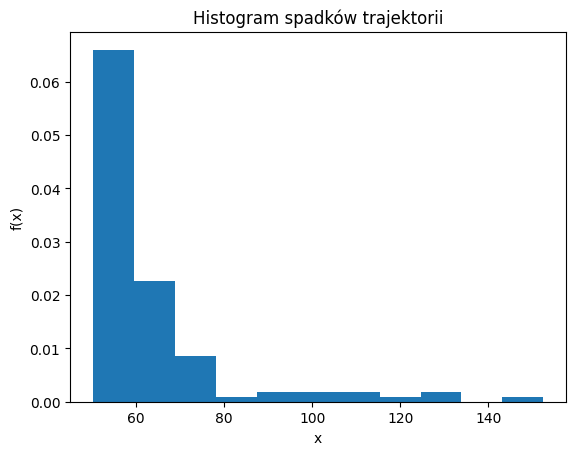

In [27]:
plt.hist(X_i, bins = "sqrt", density = True)
plt.title("Histogram spadków trajektorii")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

Wykres gęstości empirycznej przypomina wykresy gęstości z rozkładu Pareto oraz rozkładu wykładniczego. Aby ocenić z jakiego rozkładu są dane, zbadano najpierw podobieństwo wykresów gęstości empirycznych oraz teoretycznych tych, a także kilku innych rozkładów.

(2.2458519194588975, 33.495689461383556, 16.66651053861644)


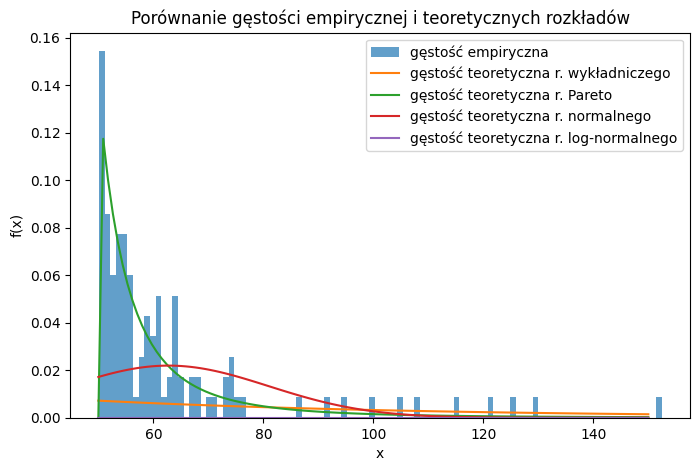

In [29]:
x = np.linspace(50,150,len(X_i))

#exponential
lambd = 1/np.mean(X_i)
#lognormal
mu = np.mean(X_i)
sigma = np.std(X_i)
#pareto
fit_params_pareto = st.pareto.fit(X_i)
print(fit_params_pareto)

plt.figure(figsize=(8,5))
plt.hist(X_i, bins=100, density=True, alpha=0.7, label='gęstość empiryczna')
plt.plot(x, (lambd * np.exp(-lambd * x)), label="gęstość teoretyczna r. wykładniczego")
plt.plot(x, st.pareto.pdf(x, b= fit_params_pareto[0], loc = fit_params_pareto[1], scale = fit_params_pareto[2]), label="gęstość teoretyczna r. Pareto")
plt.plot(x, st.norm.pdf(x, loc=mu, scale=sigma), label="gęstość teoretyczna r. normalnego")
plt.plot(x, st.lognorm.pdf(x, s=sigma, scale=np.exp(mu)), label="gęstość teoretyczna r. log-normalnego")
plt.title("Porównanie gęstości empirycznej i teoretycznych rozkładów")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Na pierwszy rzut oka widać podobieństwo między histogramem a gęstością teoretyczną rozkładu Pareto, z parametrami równymi ok. $(2.2459, 33.4957, 16.6665)$, gdzie parametr kształtu $\approx 2.2459$, a parametr skali $ \approx 16.6665$. Dla pewności przeprowadzono także testy Kołmogorowa-Smirnowa zaimplementowane w bibliotece *scipy.stats* dla powyższych rozkładów.

In [34]:
#Pareto
fit_params_pareto = st.pareto.fit(X_i)
stat_pareto, pval_pareto = st.kstest(X_i, 'pareto', args = fit_params_pareto)
#Exponential
fit_params_expon = st.expon.fit(X_i)
stat_expon, pval_expon = st.kstest(X_i, 'expon', args = fit_params_expon)
#normal
fit_params_norm = st.norm.fit(X_i)
stat_norm, pval_norm = st.kstest(X_i, 'norm', args = fit_params_norm)
print(f"P-wartości rozkładów: Pareto: {pval_pareto} Wykładniczy: {pval_expon} Normalny:{pval_norm} Lognormalny: {pval_lognorm}")

P-wartości rozkładów: Pareto: 0.9976867925160614 Wykładniczy: 0.013715940781198595 Normalny:1.797227020033166e-06 Lognormalny: 0.8621748621468044


Jak widać, P-wartość dla rozkładu Pareto wynosi ok. $0.9977$, a dla innych rozkładów jest to wartość dużo niższa, zatem można potwierdzić, że dane pochodzą z rozkładu Pareto o wcześniej wspomnianych parametrach.

Porównano także dystrybuantę empiryczną oraz dystrybuantę teoretyczną rozkładu Pareto.

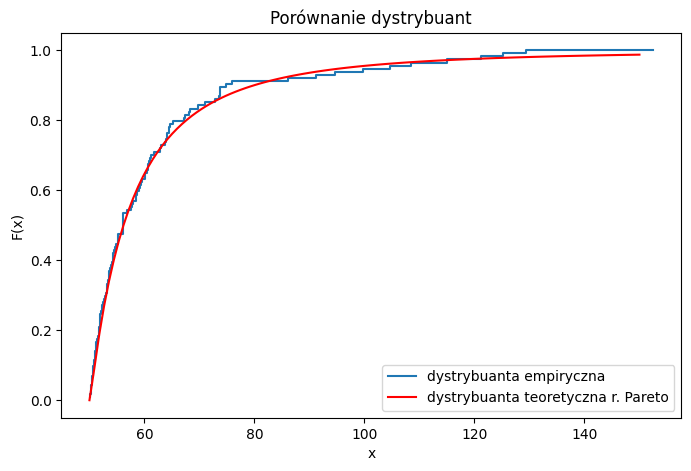

In [38]:
plt.figure(figsize=(8,5))
ecdf = ECDF(X_i)

plt.step(np.sort(X_i), ecdf(np.sort(X_i)), label="dystrybuanta empiryczna")
plt.plot(x, st.pareto.cdf(x, b = fit_params[0], loc = fit_params[1], scale = fit_params[2]), color='red', label="dystrybuanta teoretyczna r. Pareto")
plt.xlabel('x')
plt.ylabel("F(x)")
plt.title("Porównanie dystrybuant")
plt.legend()
plt.show()

Następnie znaleziono momenty skoków jednorodnego procesu Poissona oraz czasy oczekiwania na kolejny skok.

In [42]:
def moment(sample):
    times = []
    moments = []
    h = 0.01
    for i in range (len(sample)-1):
        if round(sample[i+1], 4) != round(sample[i] + c*h, 4):
            moments.append((i+1))
    time = list(np.diff(moments) / 100)
    times.extend(time)
    return times

times = moment(traj)

1.152708354585331


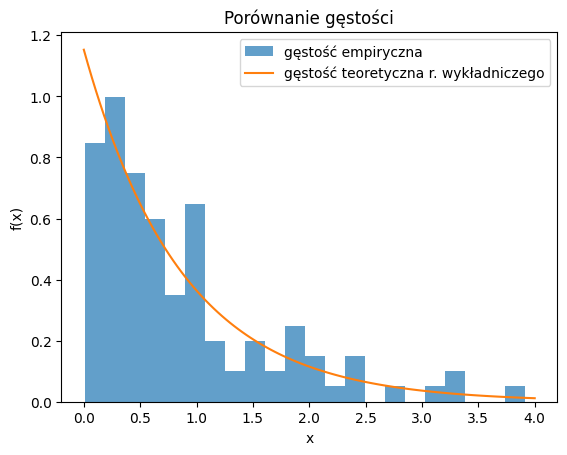

In [49]:
lam = 1/(np.mean(times))
x2 = np.linspace(0,4,len(times)-1)
print(lam)

plt.hist(times, bins=22, alpha=0.7, density=True, label="gęstość empiryczna")
plt.plot(x2, (lam * np.exp(-lam * x2)), label="gęstość teoretyczna r. wykładniczego")
plt.title("Porównanie gęstości")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Na powyższym histogramie zauważalne jest podobieństwo z wykresem gęstości teoretycznej rozkładu wykładniczego o parametrze $\approx 1.1527$. Zbadano również P-wartość w teści Kołmogorowa-Smirnowa.

In [15]:
parametry = st.expon.fit(times)
stat_ex, pval_ex = st.kstest(times, 'expon', args = parametry)
print(stat_ex, pval_ex)

0.049294977106735055 0.9337623975348005


P-wartość wynosi ok. $0.9338$, zatem można potwierdzić, że czasy oczekiwania pochodzą z rozkładu wykładniczego.

### Jednorodny proces Poissona

Ponieważ czasy oczekiwania pochodzą z rozkładu wykładniczego, szukaną intensywność $\lambda$ w jednorodnym procesie Poissona można opisać przez odwróconą intensywność rozkładu wykładniczego.

In [17]:
lambda_pois = 1/lam
theta = c / (np.mean(X_i)*lambda_pois) - 1

print(lambda_pois, theta)

0.8675221238938053 0.43254908534995407


Nastepnie skonstruowano program zwracający trajektorię jednorodnego procesu Poissona.

In [ ]:
def poiss_gen(lambada, T):
    jump = st.poisson.rvs(lambada*T)
    times = [random.random()*T for i in np.arange(jump)]
    times.sort()
    return times

Ostatecznie stworzono 100 trajektorii jednorodnego procesu Poissona i zbadano ich podobieństwo do wartości oczekiwanej.

In [ ]:
for i in range(100):
    samp = poiss_gen(lambda_pois, 100)
    plt.step(np.linspace(0,T,len(samp)), samp, color="b")
plt.step(np.linspace(0,T,len(samp)), samp, color="b", label="Jednorodny Proces Poissona, lambda = 0.8675")
plt.plot(np.linspace(0,T,len(samp)), np.linspace(0,T,len(samp)), color="r", label="Wartość oczekiwana")
plt.legend()
plt.show()

In [ ]:
for i in range(100):
    samp = poiss_gen(lambda_pois, 100)
    plt.step(np.linspace(0,T,len(samp)), samp, color="b")
plt.step(np.linspace(0,T,len(samp)), samp, color="b", label="Jednorodny Proces Poissona, lambda = 0.8675")
plt.plot(np.linspace(0,T,len(samp)), np.linspace(0,T,len(samp)), color="r", label="Wartość oczekiwana")
plt.step(np.linspace(0,T,10001), data["trajektoria"], color = "pink", label="Trajektoria z pliku z danymi")
plt.legend()
plt.show()

# Zadanie 2


## Ułamkowy ruch Browna

Ułamkowy ruch Browna jest uogólnieniem procesu Browna. Jest to proces gaussowski o funkcji średniej $$m(t) = EB_{H}(t) = 0$$ oraz funkcji autowariancji $$c(s,t) = Cov(B_{H}(s),B_{H}(t)) = \frac{\sigma^2}{2}(t^{2H} + s^{2H} - |t-s|^{2H})$$

Własności ułamkowego ruchu Browna:


*  stacjonarne przyrosty,
*  jedynie dla $H = \frac{1}{2}$ jest procesem Markowa,
*  dla $ H > \frac{1}{2}$ występuje długa pamięć,
*  samopodobieństwo,
*  nieróżniczkowalne realizacje (w sensie średniokwadratowym),
*  dla $H \neq \frac{1}{2}$  nie jest semimartyngałem.


## Rozkład Choleskiego

Niech $A$ będzie macierzą rzeczywistą, symetryczną, dodatnio
określoną. Istnieje wówczas dokładnie jedna macierz rzeczywista dolnotrójkątna $L$ mająca na głównej
przekątnej wszystkie elementy dodatnie, która spełnia warunek $$ LL^T = A$$

określany jako rozkład Cholesky'ego macierzy $A$. Macierze rzeczywiste, symetryczne i dodatnio określone
są jedynymi macierzami posiadającymi opisany rozkład Cholesky'ego.



In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gamma(k, H):
    return 0.5*(np.abs(k-1)**(2*H) - 2*np.abs(k)**(2*H) + np.abs(k+1)**(2*H))

def brown_motion_cholesky():

    L = np.zeros((n,n))
    X = np.zeros(n)
    Z = np.random.standard_normal(size = n)


    L[0,0] = 1
    X[0] = Z[0]

    L[1,0] = gamma(1,H)
    L[1,1] = np.sqrt(1 - (L[1,0]**2))
    X[1] = L[1, 0] * Z[0] + L[1, 1] * Z[1]

    for i in range(2,n):
        L[i,0] = gamma(i,H)

        for j in range(1, i):
            L[i,j] = (1/L[j,j])*(gamma(i-j,H) - np.dot(L[i, 0:j], L[j, 0:j]))

        L[i,i] = np.sqrt(1 - np.sum((L[i,0:i]**2)))
        X[i] = np.dot(L[i, 0:i + 1], Z[0:i + 1])

    return (T**H) * np.cumsum(X)*(n**(-H))


## Dla H = 0.2

In [11]:
#Parametry

n = 100
T = 10
H = 0.2
i = 0
x = np.linspace(0, T, n)


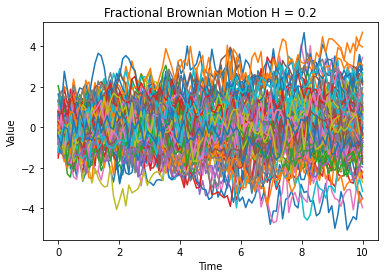

In [12]:
# Wykres trajektorii

trajectories = []

while i <= 100:
   trajectories.append(brown_motion_cholesky())
   plt.plot(x, brown_motion_cholesky())
   i +=1

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Fractional Brownian Motion H = 0.2')
plt.show()

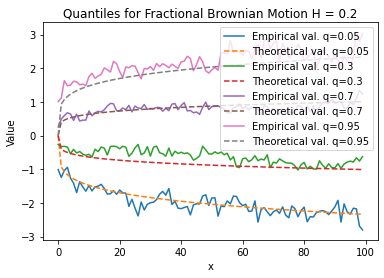

In [16]:
# Linie kwantylowe

quantiles = [0.05, 0.3, 0.7, 0.95]

empirical_quantiles = np.percentile(trajectories, q = [5, 30, 70, 95], axis=0)
theoretical_quantiles = [np.percentile(st.norm.ppf(quantiles), q = p * 100) for p in quantiles]

x = range(n)

for i in range(4):
    p = quantiles[i]
    plt.plot(x, empirical_quantiles[i], label="Empirical val. q={}".format(p))
    plt.plot(x, [theoretical_quantiles[i]*(j*T/n)**H for j in x], '--', label="Theoretical val. q={}".format(p))

plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.title("Quantiles for Fractional Brownian Motion H = 0.2")

plt.show()

## Dla H = 0.8

In [17]:
# Parametry
n = 100
T = 1
H = 0.8
i = 0
x = np.linspace(0, T, n)


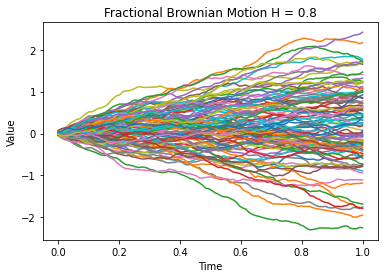

In [18]:
# Wykres trajektorii

trajectories = []

while i <= 100:
   trajectories.append(brown_motion_cholesky())
   plt.plot(x, brown_motion_cholesky())
   i +=1

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Fractional Brownian Motion H = 0.8')
plt.show()

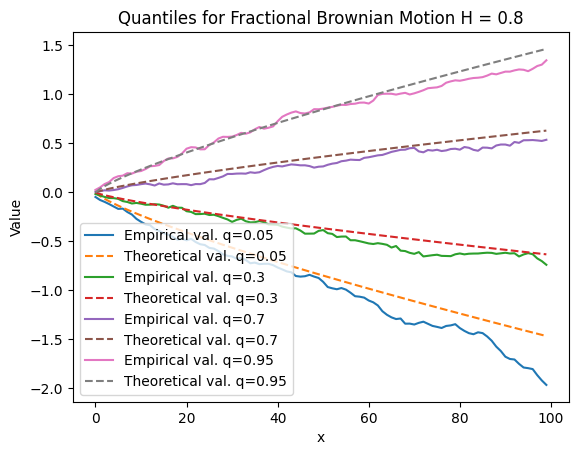

In [ ]:
#Linie kwantylowe

quantiles = [0.05, 0.3, 0.7, 0.95]


empirical_quantiles = np.percentile(trajectories, q = [5, 30, 70, 95], axis=0)
theoretical_quantiles = [np.percentile(st.norm.ppf(quantiles), q = p * 100) for p in quantiles]

x = range(n)

for i in range(4):
    p = quantiles[i]
    plt.plot(x, empirical_quantiles[i], label="Empirical val. q={}".format(p))
    plt.plot(x, [theoretical_quantiles[i]*(j*T/n)**H for j in x], '--', label="Theoretical val. q={}".format(p))

plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.title("Quantiles for Fractional Brownian Motion H = 0.8")

plt.show()

# 3. Bibliografia
1. Wykłady Prof. Marcina Magdziarza
2. http://prac.im.pwr.edu.pl/~tjurlew/al1m/al1_lis07_UK2.pdf
3. https://dbc.wroc.pl/Content/74091/Czernik_Ulamkowy_geometryczny_ruch_Browna.pdf